In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.utils import shuffle

In [10]:
df = pd.read_csv('./fake reviews dataset.csv')

# Display first few rows
print("🔹 Dataset Preview:")
print(df.head())

# ------------------------------------------
# 2️⃣ Basic info about the dataset
# ------------------------------------------
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Dataset Shape:", df.shape)

🔹 Dataset Preview:
             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None



🔹 Label Distribution:
label
CG    20216
OR    20216
Name: count, dtype: int64


C:\Users\Tejas Kavthankar\AppData\Local\Temp\ipykernel_16908\1343945536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


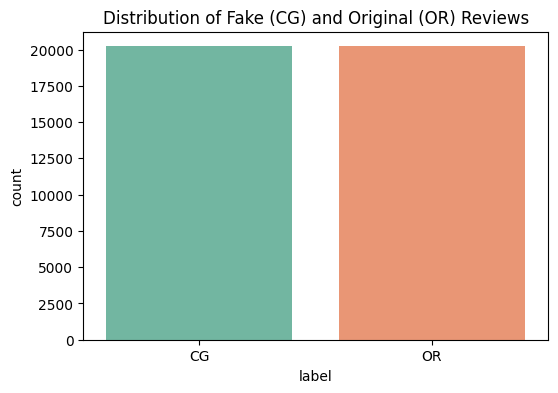

In [11]:
print("\n🔹 Label Distribution:")
print(df['label'].value_counts())  # Replace 'label' with actual column name (e.g., 'CG' or 'OR')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Fake (CG) and Original (OR) Reviews')
plt.show()


🔹 Unique Product Categories:
category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64


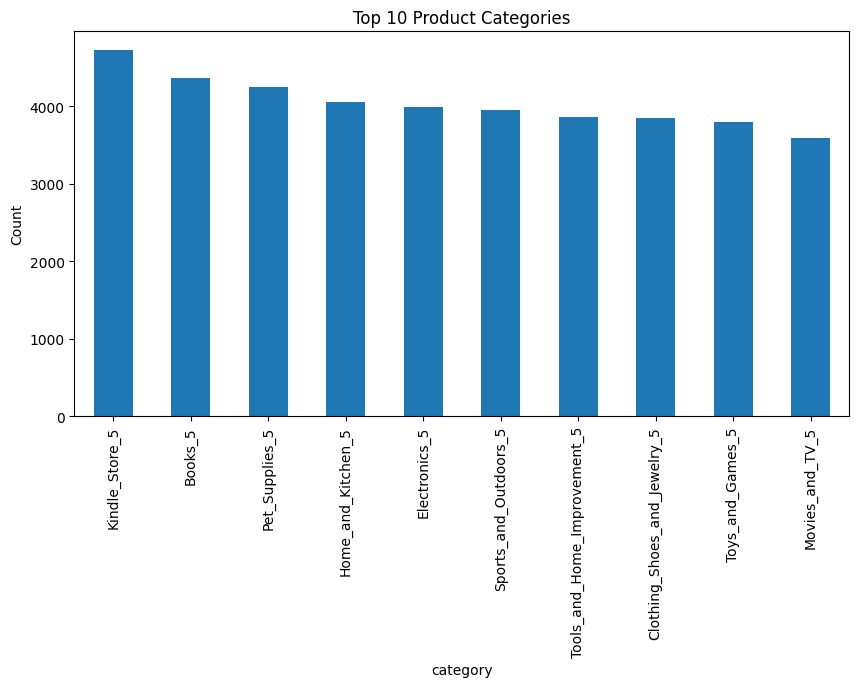

In [12]:
print("\n🔹 Unique Product Categories:")
print(df.iloc[:,0].value_counts().head(10))  # Assuming 1st column = category

plt.figure(figsize=(10,5))
df.iloc[:,0].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.ylabel('Count')
plt.show()


🔹 Review Length Stats:
count    40432.000000
mean        67.465423
std         69.581333
min          1.000000
25%         21.000000
50%         39.000000
75%         85.000000
max        373.000000
Name: review_length, dtype: float64


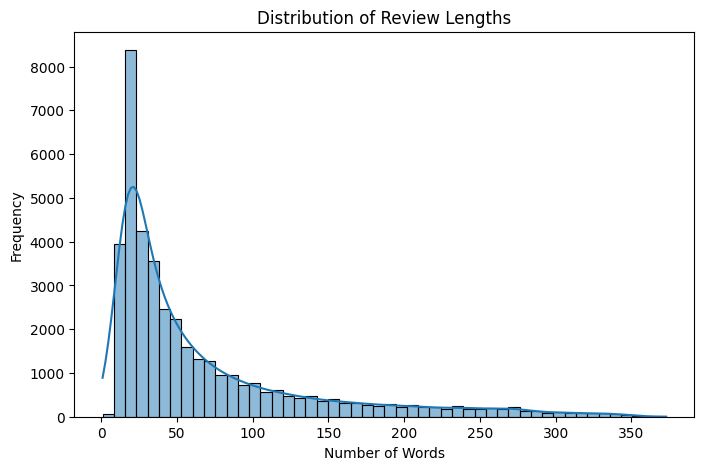

In [13]:
df['review_length'] = df['text_'].apply(lambda x: len(str(x).split()))
print("\n🔹 Review Length Stats:")
print(df['review_length'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


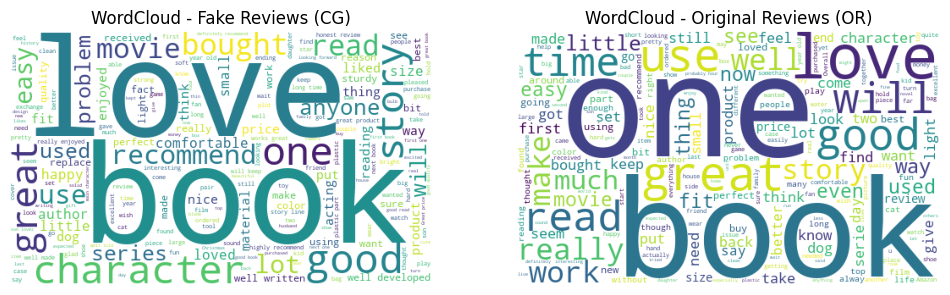

In [14]:
fake_text = ' '.join(df[df['label']=='CG']['text_'])
real_text = ' '.join(df[df['label']=='OR']['text_'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(fake_text))
plt.title("WordCloud - Fake Reviews (CG)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(real_text))
plt.title("WordCloud - Original Reviews (OR)")
plt.axis('off')

plt.show()

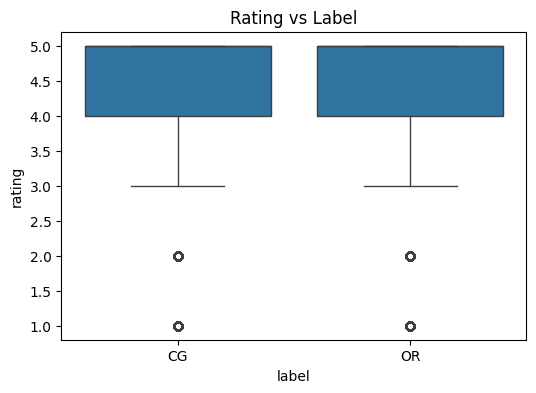

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y=df.columns[1])  # Assuming 2nd column is rating
plt.title('Rating vs Label')
plt.show()

In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text_'].apply(clean_text)

print("\n🔹 Sample Cleaned Text:")
print(df[['text_', 'clean_text']].head())


🔹 Sample Cleaned Text:
                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                          clean_text  
0  love this  well made sturdy and very comfortab...  
1  love it a great upgrade from the original  ive...  
2  this pillow saved my back i love the look and ...  
3  missing information on how to use it but it is...  
4  very nice set good quality we have had the set...  


In [17]:
df = shuffle(df, random_state=42)
print("\n✅ Data analysis completed successfully!")


✅ Data analysis completed successfully!


In [18]:
texts = df['clean_text'].astype(str).values
labels = df['label'].values

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
labels = le.fit_transform(labels)

# ------------------------------------------
# 3️⃣ Train-test split
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print("✅ Train size:", len(X_train))
print("✅ Test size:", len(X_test))

✅ Train size: 32345
✅ Test size: 8087


In [22]:
vocab_size = 20000  # You can adjust based on your dataset
max_len = 150       # Based on your review length stats (75% = 85 words, so 150 is safe)
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


print("✅ Tokenization complete!")
print("🔹 Example sequence:", X_train_seq[0][:15])

✅ Tokenization complete!
🔹 Example sequence: [4, 14, 18, 599, 16, 9, 24, 2, 361, 2368, 8, 3, 4201, 779, 735]


In [23]:
BATCH_SIZE = 64
train_ds = tf.data.Dataset.from_tensor_slices((X_train_pad, y_train)).shuffle(10000).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_pad, y_test)).batch(BATCH_SIZE)

print("✅ TensorFlow datasets ready for training!")

✅ TensorFlow datasets ready for training!


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
embedding_dim = 128  # You can tune this
max_len = 150        # Must match from preprocessing
vocab_size = 20000 

In [26]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\Tejas Kavthankar\Desktop\dataset\fake-review\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [40]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 281s 555ms/step - accuracy: 0.9816 - loss: 0.0540 - val_accuracy: 0.9557 - val_loss: 0.1322
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 254s 503ms/step - accuracy: 0.9883 - loss: 0.0334 - val_accuracy: 0.9483 - val_loss: 0.1575
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 260s 513ms/step - accuracy: 0.9926 - loss: 0.0212 - val_accuracy: 0.9541 - val_loss: 0.1827


In [41]:
loss, acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"✅ Test Loss: {loss:.4f}")

127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9557 - loss: 0.1322

✅ Test Accuracy: 0.9557
✅ Test Loss: 0.1322


In [42]:
# ==========================================
# 🔍 Inference Function for Fake Review Detection
# ==========================================

import numpy as np
import tensorflow as tf
import pickle
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load the saved model and tokenizer
# model = load_model("bilstm_fake_review_model.h5")

# with open("tokenizer.pkl", "rb") as f:
#     tokenizer = pickle.load(f)

# Constants (must match training)
max_len = 150

# ------------------------------------------
# 🧹 Text cleaning function (same as before)
# ------------------------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

# ------------------------------------------
# 🔮 Inference function
# ------------------------------------------
def predict_review(review_text):
    # Clean and tokenize input text
    cleaned = clean_text(review_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    
    # Get prediction probability
    pred = model.predict(padded)[0][0]
    
    # Label assignment
    label = "FAKE REVIEW (CG)" if pred >= 0.5 else "REAL REVIEW (OR)"
    
    print(f"🔹 Review: {review_text}")
    print(f"🔹 Cleaned: {cleaned}")
    print(f"🔹 Prediction Score: {pred:.4f}")
    print(f"✅ Result: {label}\n")
    
    return label

# ------------------------------------------
# 🧠 Example Usage
# ------------------------------------------
sample_1 = "This product is amazing! Works better than I expected."
sample_2 = "Great product good nice amazing quality love it recommend 100%."
sample_3 = "Terrible item. Totally useless. Waste of money."

predict_review(sample_1)
predict_review(sample_2)
predict_review(sample_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
🔹 Review: This product is amazing! Works better than I expected.
🔹 Cleaned: this product is amazing works better than i expected
🔹 Prediction Score: 0.8587
✅ Result: FAKE REVIEW (CG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
🔹 Review: Great product good nice amazing quality love it recommend 100%.
🔹 Cleaned: great product good nice amazing quality love it recommend
🔹 Prediction Score: 0.9390
✅ Result: FAKE REVIEW (CG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🔹 Review: Terrible item. Totally useless. Waste of money.
🔹 Cleaned: terrible item totally useless waste of money
🔹 Prediction Score: 0.4395
✅ Result: REAL REVIEW (OR)



'REAL REVIEW (OR)'

In [43]:
predict_review("Missing information on how to use it, but it is a great product for the price!  I")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🔹 Review: Missing information on how to use it, but it is a great product for the price!  I
🔹 Cleaned: missing information on how to use it but it is a great product for the price  i
🔹 Prediction Score: 0.0061
✅ Result: REAL REVIEW (OR)



'REAL REVIEW (OR)'

In [45]:
review = "Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed."
predict_review(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
🔹 Review: Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed.
🔹 Cleaned: triple a rate with upgrade to view room was less than  which also included breakfast vouchers had a great view of river lake wrigley bldg  tribune bldg most major restaurants shopping sightseeing attractions within walking distance large room with a very comfortable bed
🔹 Prediction Score: 0.9992
✅ Result: FAKE REVIEW (CG)



'FAKE REVIEW (CG)'

In [60]:
model.save("model1.keras")

In [63]:
model1 = load_model("model1.keras")
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,987,525 (34.28 MB)

 Trainable params: 2,995,841 (11.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,991,684 (22.86 MB)

In [49]:
from tensorflow.keras.models import save_model

model.save("my_model.h5")   # saves entire model (architecture + weights + optimizer state)


In [55]:
model.save("bilstm_fake_review_model.h5")   # HDF5 format
print("✅ Model saved as bilstm_fake_review_model.h5")

✅ Model saved as bilstm_fake_review_model.h5


In [56]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("✅ Tokenizer saved as tokenizer.pkl")


✅ Tokenizer saved as tokenizer.pkl


In [57]:
from tensorflow.keras.models import load_model
import pickle

# ✅ Load model
model = load_model("bilstm_fake_review_model.h5")

# ✅ Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

print("✅ Model and tokenizer successfully loaded!")


✅ Model and tokenizer successfully loaded!


In [64]:
loss, acc = model1.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"✅ Test Loss: {loss:.4f}")

127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.9557 - loss: 0.1322

✅ Test Accuracy: 0.9557
✅ Test Loss: 0.1322
